# Previous Core assignment (Preparing Time Series from Wide-Form Data)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
df  = pd.read_csv("Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv", low_memory=False)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911,236638.746311,...,749768.780675,743507.948420,740969.925313,740779.387826,741056.350953,740172.835655,738291.164083,735798.371147,732748.857514,729936.251796
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588,213153.307980,...,873199.308735,859651.039278,853435.620449,853729.382881,859261.199649,870023.413651,884762.732984,899861.260508,912292.259922,920604.541480
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564,99745.413436,...,259580.385676,258628.779091,258313.807860,258572.818779,259434.215982,260365.844785,261312.633063,261764.062358,261916.246524,261763.572982
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967,139581.891084,...,274444.283510,274268.935295,275101.487400,276077.838516,277158.265748,278409.007738,280176.702702,281874.765433,282900.414280,283388.833223
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,95588.736641,95677.479794,...,258257.378090,257082.811480,256078.547768,255852.274328,256156.810635,256375.991923,256509.265800,256072.964802,255248.998317,254014.432475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,NaN,NaN,...,121583.325890,120430.626232,121160.247730,122830.235080,123753.019481,123578.154458,122092.017493,121437.282358,120853.618646,119793.108894
21575,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,NaN,NaN,...,124397.905711,125059.867619,126007.926291,128059.244526,129545.446334,130079.953385,130911.716441,131520.105626,131550.144162,131017.006312
21576,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,NaN,NaN,...,292720.800193,294229.945253,295993.273025,298785.914710,301290.126203,303413.143227,305226.291873,306366.675179,306881.195210,306584.388100
21577,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,NaN,NaN,...,67020.388601,66695.823572,67326.262559,68124.384668,68856.848925,70150.319018,72023.150088,74247.326229,75918.356393,77044.908106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Columns: 295 entries, RegionID to 2023-11-30
dtypes: float64(287), int64(2), object(6)
memory usage: 48.6+ MB


## Convert datetime to one column

In [4]:
df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911,236638.746311,...,749768.780675,743507.948420,740969.925313,740779.387826,741056.350953,740172.835655,738291.164083,735798.371147,732748.857514,729936.251796
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588,213153.307980,...,873199.308735,859651.039278,853435.620449,853729.382881,859261.199649,870023.413651,884762.732984,899861.260508,912292.259922,920604.541480
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564,99745.413436,...,259580.385676,258628.779091,258313.807860,258572.818779,259434.215982,260365.844785,261312.633063,261764.062358,261916.246524,261763.572982


In [5]:
id_vars = df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [6]:
melted = pd.melt(df,id_vars=id_vars, value_name='Value',var_name='Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,235386.064911
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,212831.058588
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,99770.762564
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,139544.608967
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,2000-01-31,95588.736641
...,...,...,...,...,...,...,...,...,...,...
6193168,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,2023-11-30,119793.108894
6193169,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,2023-11-30,131017.006312
6193170,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2023-11-30,306584.388100
6193171,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,2023-11-30,77044.908106


In [7]:
melted.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
State          object
Metro          object
CountyName     object
Date           object
Value         float64
dtype: object

### # Now that we have our melted dataframe, we can slice out the countries of interest and begin preparing our datetime index.

In [8]:
melted['Date'][0]

'2000-01-31'

In [9]:
melted.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,235386.064911
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,212831.058588
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,99770.762564


In [10]:
# First, we will convert the 'Date' column values to datetime objects.
melted['Date'] = pd.to_datetime(melted['Date'])
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,235386.064911
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,212831.058588
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,99770.762564
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,139544.608967
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,2000-01-31,95588.736641
...,...,...,...,...,...,...,...,...,...,...
6193168,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,2023-11-30,119793.108894
6193169,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,2023-11-30,131017.006312
6193170,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2023-11-30,306584.388100
6193171,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,2023-11-30,77044.908106


In [11]:
melted.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
RegionType            object
StateName             object
State                 object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
dtype: object

In [12]:
# We will need to set Date as our index, but we will NOT resample just yet
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967
2000-01-31,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,95588.736641
...,...,...,...,...,...,...,...,...,...
2023-11-30,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,119793.108894
2023-11-30,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,131017.006312
2023-11-30,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,306584.388100


In [13]:
melted.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31',
               ...
               '2023-11-30', '2023-11-30', '2023-11-30', '2023-11-30',
               '2023-11-30', '2023-11-30', '2023-11-30', '2023-11-30',
               '2023-11-30', '2023-11-30'],
              dtype='datetime64[ns]', name='Date', length=6193173, freq=None)

In [14]:
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967
2000-01-31,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,95588.736641


In [15]:
melted ['SizeRank'].unique

<bound method Series.unique of Date
2000-01-31        0
2000-01-31        1
2000-01-31        2
2000-01-31        3
2000-01-31        4
              ...  
2023-11-30    30116
2023-11-30    30116
2023-11-30    30116
2023-11-30    30116
2023-11-30    30116
Name: SizeRank, Length: 6193173, dtype: int64>

In [16]:
# Filter the DataFrame to include only the rows with Rank values [0, 1, 2, 3]
filtered_melted = melted[melted['SizeRank'].isin([0, 1, 2, 3])]

In [17]:
filtered_melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235386.064911
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,212831.058588
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,99770.762564
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,139544.608967
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,236638.746311
...,...,...,...,...,...,...,...,...,...
2023-10-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,282900.414280
2023-11-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,729936.251796
2023-11-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,920604.541480


## Monthly frequency based on city

In [18]:
df_city_monthly = filtered_melted.groupby('RegionName').resample('M').asfreq()
df_city_monthly

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2023-07-31      6181         0   New York       city        NY   
           2023-08-31      6181         0   New York       city        NY   
           2023-09-30      6181         0   New York       city        NY   
           2023-10-31      6181         0   New York       city        NY   
           2023-11-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2023-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-10-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-11-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName          Value  
RegionName Date                                      
Chicago    2000-01-31    Cook County  139544.608967  
           2000-02-29    Cook County  139581.891084  
           2000-03-31    Cook County  139930.788018  
           2000-04-30    Cook County  140831.833595  
           2000-05-31    Cook County  141984.604541  
...                              ...            ...  
New York   2023-07-31  Queens County  740172.835655  
           2023-08-31  Queens County  738291.164083  
           2023-09-30  Queens County  735798.371147  
           2023-10-31  Queens County  732748.857514  
           2023-11-30  Queens County  729936.251796  

[1148 rows x 9 columns]

# 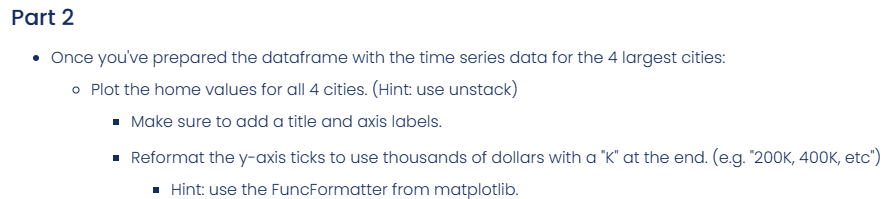

In [19]:
# This operation is used to pivot the DataFrame. It moves the values of the specified level (in this case, level 0) of the DataFrame's multi-level index to become columns. 
# This essentially transforms the DataFrame from a multi-level index structure to a more tabular format.
# ['Value']: After unstacking, it selects the column named 'Value' from the resulting DataFrame. 
# The assumption here is that 'Value' is a column containing the actual data values.
df_city_monthly_unstacked = df_city_monthly.unstack(level=0)['Value']
df_city_monthly_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,139544.608967,99770.762564,212831.058588,235386.064911
2000-02-29,139581.891084,99745.413436,213153.307980,236638.746311
2000-03-31,139930.788018,99607.387957,214097.263791,237921.087373
2000-04-30,140831.833595,99566.590591,215980.879821,240388.532500
2000-05-31,141984.604541,99551.398920,218333.277792,242893.129921
...,...,...,...,...
2023-07-31,278409.007738,260365.844785,870023.413651,740172.835655
2023-08-31,280176.702702,261312.633063,884762.732984,738291.164083
2023-09-30,281874.765433,261764.062358,899861.260508,735798.371147


In [20]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"


fmt_thous = mticks.FuncFormatter(thousands)

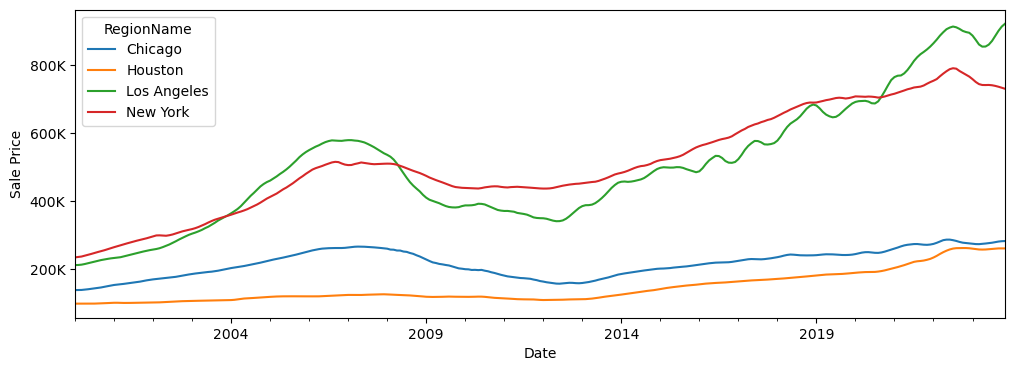

In [21]:
ax = df_city_monthly_unstacked.plot(figsize=(12,4));
plt.ylabel('Sale Price')
ax.yaxis.set_major_formatter(fmt_thous)


# Answer the following 2 questions using pandas

### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?.

- Answer is New York and houston

In [22]:
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [23]:
df_city_monthly_unstacked.loc['12/2008'].idxmax(axis=1)

Date
2008-12-31    New York
Freq: M, dtype: object

### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?s

In [24]:
df_city_monthly_unstacked.columns

Index(['Chicago', 'Houston', 'Los Angeles', 'New York'], dtype='object', name='RegionName')

In [25]:
# It calculates the DIFFERENCE between each row and the prior row by default (to calculate the difference between other # of rows, you can use the periods argument.)
df_city_monthly_unstacked.diff().loc['12/2008']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,"-4,511.64",-856.34,"-10,230.99","-3,988.83"


________________

# CORE (Gridsearch SARIMA Models)

In [26]:
import matplotlib as mpl

import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split

from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)

import statsmodels.tsa.api as tsa

#set_config(transform_output="pandas")
plt.rcParams["figure.figsize"] = (12, 4)
sns.set_context("talk", font_scale=0.9)

# set random seed
SEED = 321
np.random.seed(SEED)

In [27]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    
### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags == None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df["mean"].plot(ax=ax, color="green", label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(
        forecast_df.index,
        forecast_df["mean_ci_lower"],
        forecast_df["mean_ci_upper"],
        color="green",
        alpha=0.3,
        lw=2,
    )

    # set the title and add legend
    ax.set_title(title)
    ax.legend()

    return fig, ax

In [28]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, icbest) = tsa.adfuller(ts, **kwargs)
    
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {
        "Test Statistic": test_stat,
        "# of Lags Used": nlags,
        "# of Observations": nobs,
        "p-value": round(pval, 6),
        "alpha": alpha,
        "sig/stationary?": pval < alpha,
    }
    
    return pd.DataFrame(adfuller_results, index=[label])

In [29]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [30]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                  acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                  seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    # Sig lags line style
    sig_vline_kwargs = dict(ls=":", lw=1, zorder=0, color="red")

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts, nlags=nlags, alpha=alpha, type="ACF")
        for lag in sig_acf_lags:
            axes[0].axvline(lag, label="sig", **sig_vline_kwargs)

    # PACF
    tsa.graphics.plot_pacf(ts, ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts, nlags=nlags, alpha=alpha, type="PACF")
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label="sig", **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags // m

        # Seasonal Lines style
        seas_vline_kwargs = dict(ls="--", lw=1, alpha=0.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons + 1):
            axes[0].axvline(m * i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m * i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig

In [31]:
# Filter the dataset only to include values starting in 2018
filtered_st_2018 = df_city_monthly_unstacked.loc['2018':]
filtered_st_2018

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2018-01-31,"236,053.26","172,397.39","577,871.15","649,551.64"
2018-02-28,"238,059.36","172,933.45","590,020.02","654,555.28"
2018-03-31,"240,580.68","173,687.96","605,031.45","659,591.04"
2018-04-30,"242,636.69","174,494.33","617,888.20","663,978.58"
2018-05-31,"243,805.57","175,395.84","627,606.23","669,115.01"
...,...,...,...,...
2023-07-31,"278,409.01","260,365.84","870,023.41","740,172.84"
2023-08-31,"280,176.70","261,312.63","884,762.73","738,291.16"
2023-09-30,"281,874.77","261,764.06","899,861.26","735,798.37"


In [32]:
#check for nulls
filtered_st_2018.isna().sum()

RegionName
Chicago        0
Houston        0
Los Angeles    0
New York       0
dtype: int64

In [33]:
filtered_st_2018.index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
      

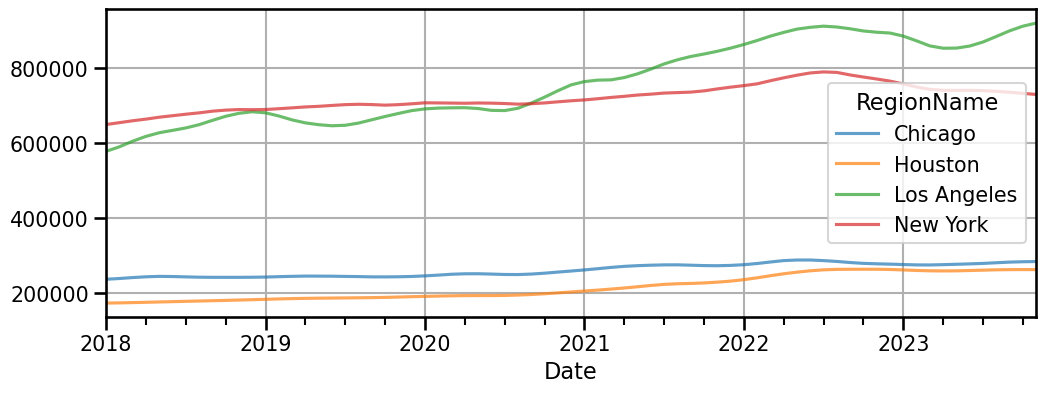

In [34]:
filtered_st_2018.plot(grid=True,alpha=0.7);

In [37]:
# Was getting error becasue it can only decompose one column at a time, so we are interested in NY per assignment
ts = df_city_monthly_unstacked['New York']
ts

Date
2000-01-31   235,386.06
2000-02-29   236,638.75
2000-03-31   237,921.09
2000-04-30   240,388.53
2000-05-31   242,893.13
                ...    
2023-07-31   740,172.84
2023-08-31   738,291.16
2023-09-30   735,798.37
2023-10-31   732,748.86
2023-11-30   729,936.25
Freq: M, Name: New York, Length: 287, dtype: float64

In [38]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from 'C:\\Users\\rdrlr\\anaconda3\\envs\\dojo-env\\lib\\site-packages\\statsmodels\\tsa\\api.py'>

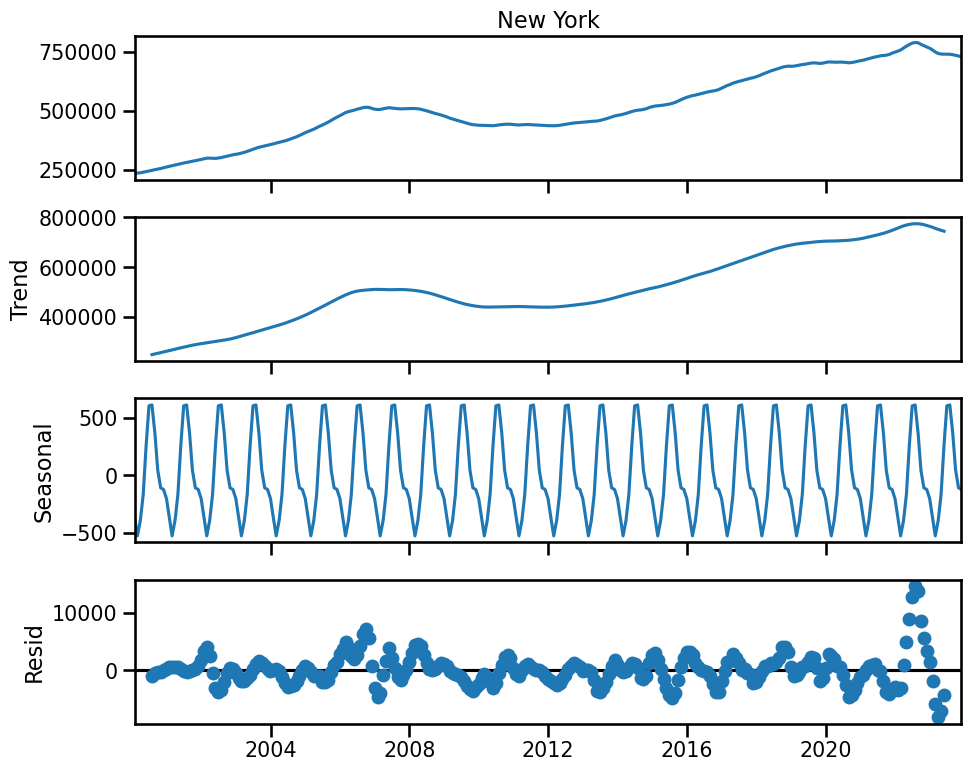

In [39]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [40]:
# this will bring back seasonal (bring back numbers that make the component)
seasonal = decomp.seasonal
seasonal 

Date
2000-01-31   -372.17
2000-02-29   -524.59
2000-03-31   -390.41
2000-04-30   -166.08
2000-05-31    262.95
               ...  
2023-07-31    610.11
2023-08-31    365.77
2023-09-30     44.70
2023-10-31   -108.56
2023-11-30   -122.38
Freq: M, Name: seasonal, Length: 287, dtype: float64

In [41]:
seasonal .max()

610.1070020174296

In [42]:
seasonal .min()

-524.5929521013081

In [43]:
# How big is the seasonal component
magnitude = decomp.seasonal.max() - decomp.seasonal.min()
magnitude

1134.6999541187379

In [45]:
# How big is the seasonal component
seasonal_delta = seasonal.max() - seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts.max()-ts.min()) * 100 :.2f}%")

The seasonal component is 1134.6999541187379 which is ~0.20%


The component is .20% of original data, this might just be noise.  We use this to decide if we need a seasonal component, since it was so low we dont need the seasonal compnent.   A non -seasonal ARIMA will probably be enough.  So we don't need to do the seasonal model part. 

In [51]:
from pmdarima.arima.utils import ndiffs

In [52]:
# use ndiffs to determine differencing
d = ndiffs(ts)
print(f'd is {d}')

d is 1


In [53]:
# Testing the raw data for stationarity
get_adfuller_results(ts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.45,14,272,0.56,0.05,False


,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.22,16,269,0.20,0.05,False


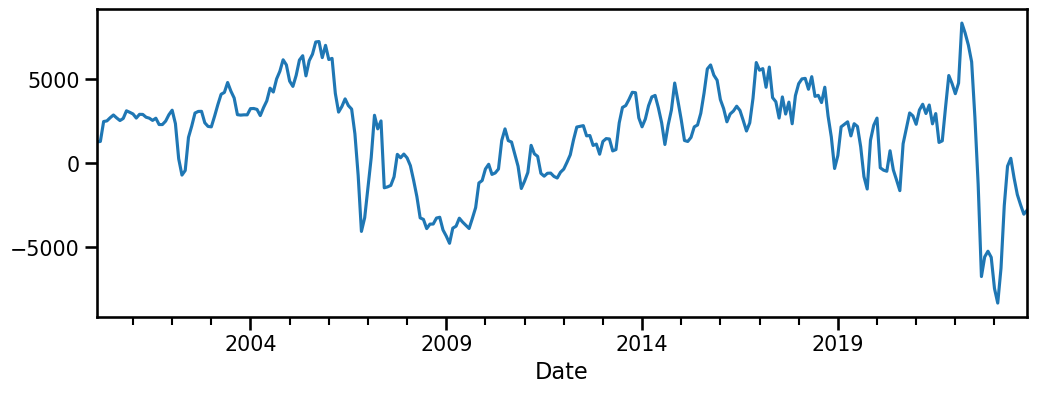

In [54]:
# Differencing the data once. need to do nulls again . makes stationary enought to model on
# this is contradicting d=1, but we can move on
ts_diff = ts.diff().dropna()
ts_diff.plot()
# Checking for stationarity
get_adfuller_results(ts_diff)

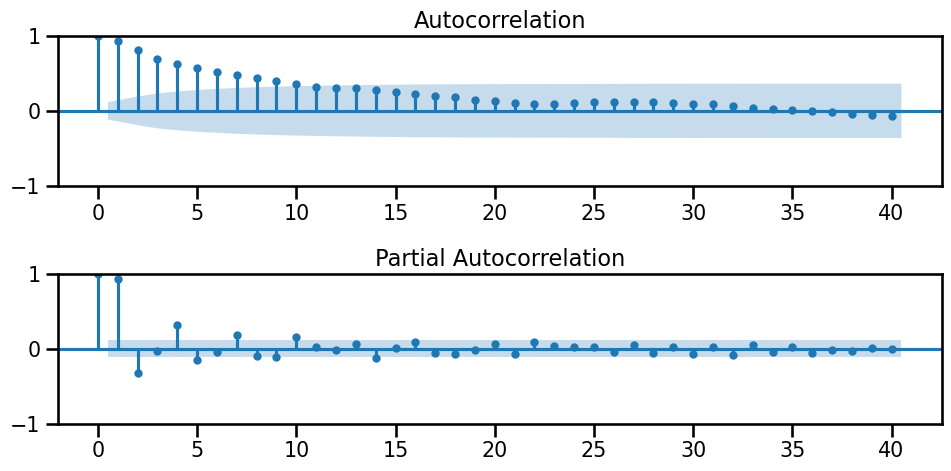

In [55]:
# look at dotted lines show at sesaonal level look at these to choose P and Q
# removed , m=12, annotate_seas=True because we aren't doing seasonal modeling
# lower case p and q need to look at whole plot 
# because there is no clear patters on acf and pcf plots will use P,Q,p,q set to 1 on next steps
plot_acf_pacf(ts_diff);

## Train Test Split

- Split the data into training and testing subsets. The test set should be one year of data
- Plot the train and test sets

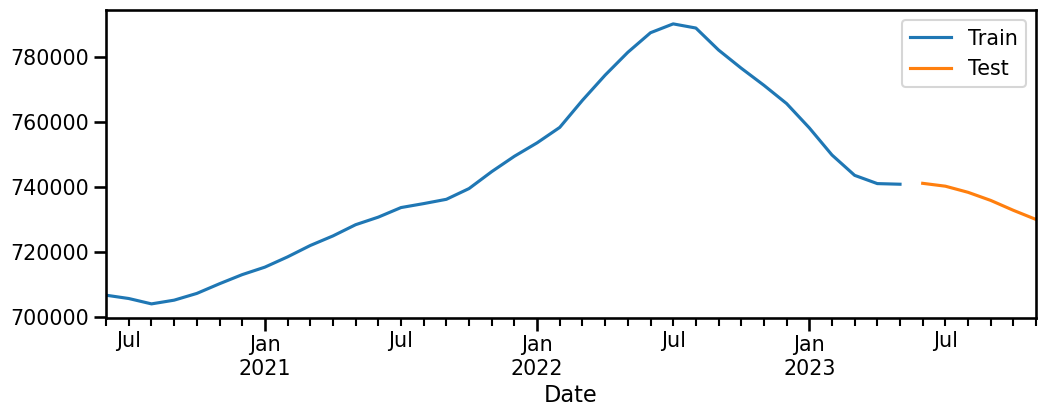

In [58]:
# .tail(36) gives you the last 36 observations and zooms in for you to see more of test. 
# used 6 for 6 months 
nlags = 6
train, test = train_test_split(ts, test_size=nlags)
ax = train.tail(36).plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

## Modeling

- Start with an initial model using manually chosen non-seasonal and seasonal orders
- Fit a seasonal ARIMA
- Generate a forecast dataframe
- Use `plot_forecast` and `regression_metrics_ts` to evaluate the model
- Examine `model.summary()`
- Examine `model.plot_diagnostics()`

In [59]:
# Initial model

# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
#  DONT need these becasue not doing seasonal modeling 
# P = 0  # Seasonal AR
# D = 1  # Seasonal differencing
# Q = 1  # Seasonal MA
# m = 12 # Seasonal period

model_1= tsa.ARIMA(train, order = (p,d,q)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,528.417
- MSE = 35,462,640.603
- RMSE = 5,955.052
- R^2 = -1.241
- MAPE = 0.62%


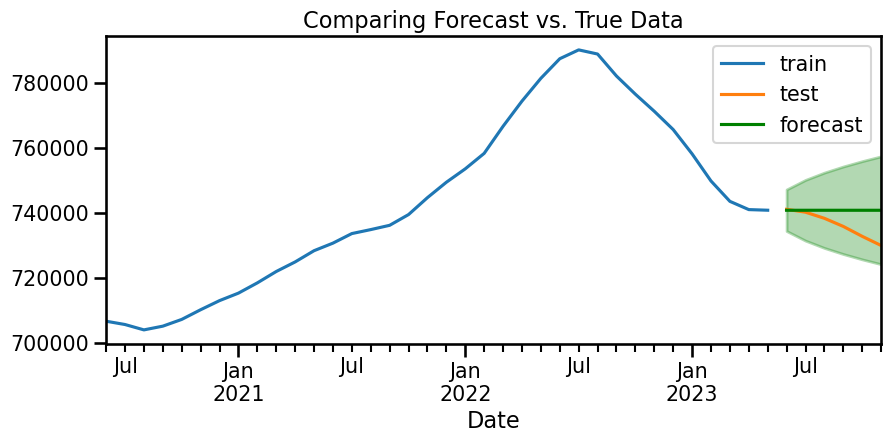

In [61]:
# Obtain summary of forecast as dataframe
forecast_ts = model_1.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_ts, n_train_lags=36)
# Obtain metrics
regression_metrics_ts(test, forecast_ts["mean"])

In [62]:
# Obtain summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               New York   No. Observations:                  281
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2663.922
Date:                Wed, 24 Jan 2024   AIC                           5331.844
Time:                        13:50:33   BIC                           5339.113
Sample:                    01-31-2000   HQIC                          5334.759
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0674      0.004     18.147      0.000       0.060       0.075
sigma2      1.063e+07   7.33e-12   1.45e+18      0.000    1.06e+07    1.06e+07
===================================================================================
Ljung-Box (L1) (Q):                 197.05   Jarque-Bera (JB):               140.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -1.12
Prob(H) (two-sided):                  0.96   Kurtosis:                         5.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.51e+33. Standard errors may be unstable.
"""

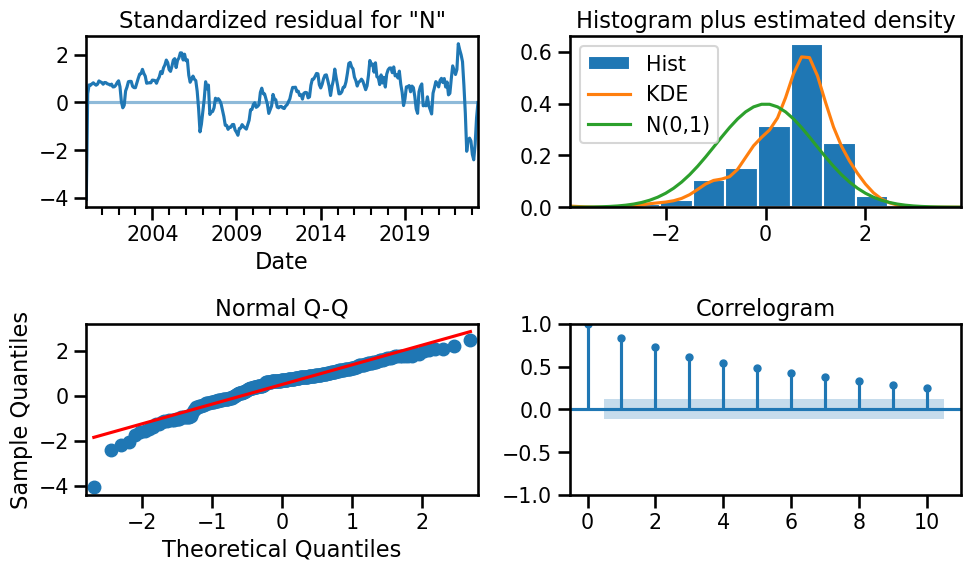

In [63]:
# Obtain diagnostic plots
fig = model_1.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [65]:
# Default auto_arima will select model based on AIC score
# removed seonsal section 
auto_model = pm.auto_arima(
    train,    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5219.937, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5259.229, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5249.885, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5251.989, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5350.020, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5259.877, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5216.582, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5214.109, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5261.417, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5280.026, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5228.685, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.997 seconds


In [68]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
# print(auto_model.seasonal_order)

(1, 1, 1)


In [69]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2603.055
Date:                Wed, 24 Jan 2024   AIC                           5214.109
Time:                        13:56:37   BIC                           5228.648
Sample:                    01-31-2000   HQIC                          5219.941
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    113.8634     62.996      1.807      0.071      -9.606     237.333
ar.L1          0.9207      0.035     25.937      0.000       0.851       0.990
ma.L1         -0.8912      0.038    -23.308      0.000      -0.966      -0.816
sigma2      6.792e+06      0.001   6.71e+09      0.000    6.79e+06    6.79e+06
===================================================================================
Ljung-Box (L1) (Q):                 229.25   Jarque-Bera (JB):                38.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.78
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.53e+25. Standard errors may be unstable.
"""

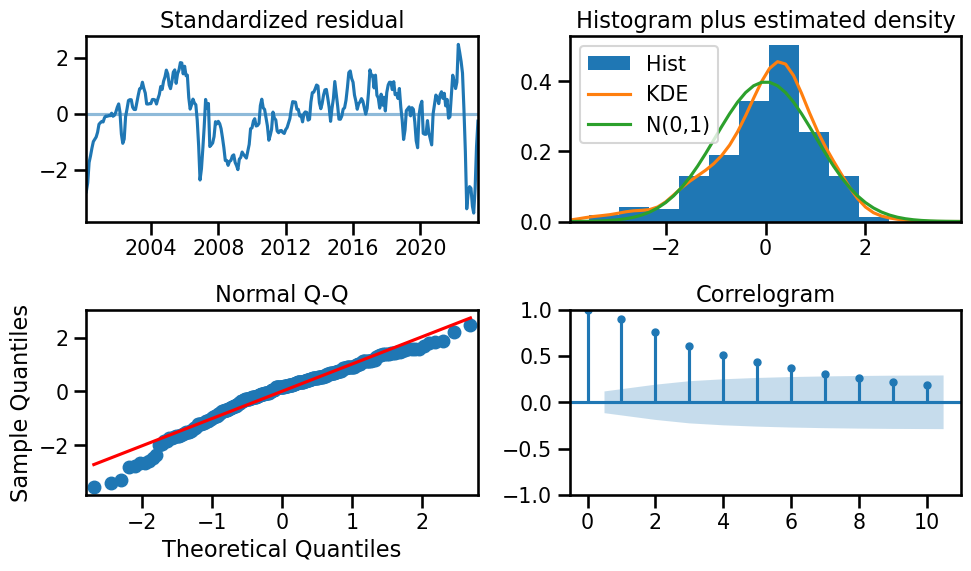

In [70]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,683.785
- MSE = 37,656,077.517
- RMSE = 6,136.455
- R^2 = -1.380
- MAPE = 0.64%


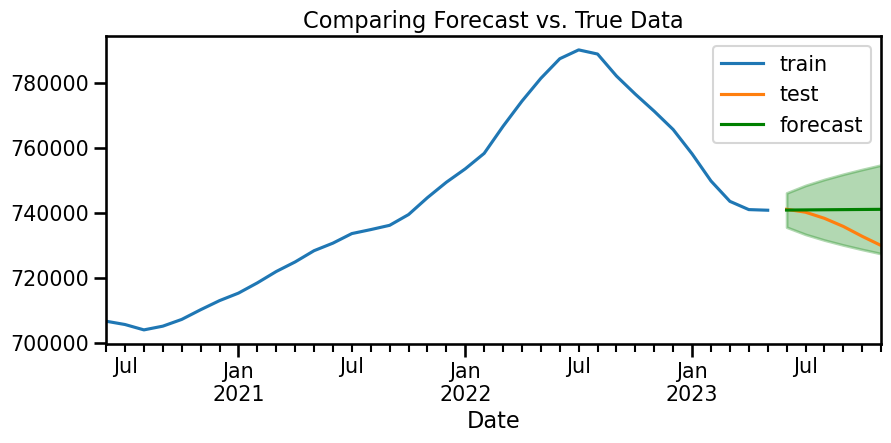

In [73]:
# Use auto_arima parameters to fit an ARIMA
# removed sesonal 
model_2 = tsa.ARIMA(
    train, order=auto_model.order).fit()

# Obtain forecast as a dataframe with confidence intervals
forecast_ts = model_2.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_ts, n_train_lags=36);
# Obtain metrics
regression_metrics_ts(test, forecast_ts['mean'])

In [74]:
# removed seasonal_order=auto_model.seasonal_order
final_model = tsa.ARIMA(
    ts, order=auto_model.order, 
).fit()

In [75]:

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               New York   No. Observations:                  287
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2666.037
Date:                Wed, 24 Jan 2024   AIC                           5338.075
Time:                        14:00:06   BIC                           5349.043
Sample:                    01-31-2000   HQIC                          5342.471
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9720      0.007    136.646      0.000       0.958       0.986
ma.L1         -0.9477      0.009   -100.580      0.000      -0.966      -0.929
sigma2      7.135e+06   4.43e-11   1.61e+17      0.000    7.13e+06    7.13e+06
===================================================================================
Ljung-Box (L1) (Q):                 236.61   Jarque-Bera (JB):                27.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.68
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.53e+33. Standard errors may be unstable.
"""

In [76]:
test

Date
2023-06-30   741,056.35
2023-07-31   740,172.84
2023-08-31   738,291.16
2023-09-30   735,798.37
2023-10-31   732,748.86
2023-11-30   729,936.25
Freq: M, Name: New York, dtype: float64

In [77]:
forecast_ts

New York,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-06-30,"740,827.77","2,684.72","735,565.83","746,089.72"
2023-07-31,"740,874.89","3,841.20","733,346.27","748,403.51"
2023-08-31,"740,920.79","4,758.16","731,594.97","750,246.61"
2023-09-30,"740,965.49","5,555.34","730,077.23","751,853.75"
2023-10-31,"741,009.02","6,278.36","728,703.66","753,314.39"
2023-11-30,"741,051.42","6,950.26","727,429.17","754,673.67"


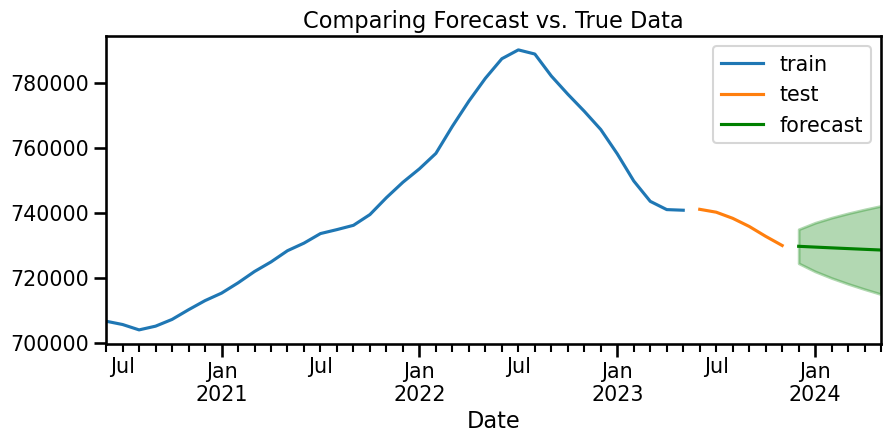

In [79]:
# Obtain forecast as a dataframe with confidence intervals
forecast_ts = final_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_ts, n_train_lags=36);

In [80]:
forecast_ts

New York,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-12-31,"729,687.10","2,671.12","724,451.81","734,922.39"
2024-01-31,"729,444.92","3,823.74","721,950.53","736,939.31"
2024-02-29,"729,209.51","4,738.84","719,921.55","738,497.47"
2024-03-31,"728,980.68","5,535.31","718,131.67","739,829.69"
2024-04-30,"728,758.24","6,258.40","716,492.00","741,024.49"
2024-05-31,"728,542.03","6,930.92","714,957.68","742,126.38"


In [81]:
starting_value = forecast_ts['mean'].iloc[0]
starting_value

729687.1017068258

In [82]:
final_value = forecast_ts['mean'].iloc[-1]
final_value

728542.0328988553

In [83]:
# Our model's forecast indicates that the number of assults will increase by about 471 over the forecast period.
# We could also calculate this as a percentage by dividing the delta by the starting value.forecast_df
change = final_value - starting_value
change

-1145.0688079704996

In [84]:
# theres going to be a 30% increase 
perc_change = (change / starting_value) * 100
perc_change

-0.15692600366541304

What is the predicted home value in New York City 6 months into the future (beyond the dataset)?
- About $728,542
  
What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?
- About .15%-.16%